# Exploratory Data Analysis: MetaHate

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state = 42

## Load Dataset

In [2]:
PATH = "data/available_metahate.tsv"
df = pd.read_csv(PATH, sep = "\t")
df.head()

,label,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
print(f"Num Rows: {df.shape[0]}, Num Cols: {df.shape[1]}")

Num Rows: 1101165, Num Cols: 2


In [4]:
## Drop Duplicate text posts as a sanity check 
df = df.drop_duplicates(subset = "text", keep = "first").reset_index(drop = True)
df.head()

,label,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
print(f"Num Rows: {df.shape[0]}, Num Cols: {df.shape[1]}")

Num Rows: 1101165, Num Cols: 2


## Investigate Class Imbalance

In [6]:
label_counts = df['label'].value_counts().reset_index()
label_counts

,label,count
0,0,867876
1,1,233289


In [7]:
label_counts.columns = ['label', 'count']
label_counts.head()

,label,count
0,0,867876
1,1,233289


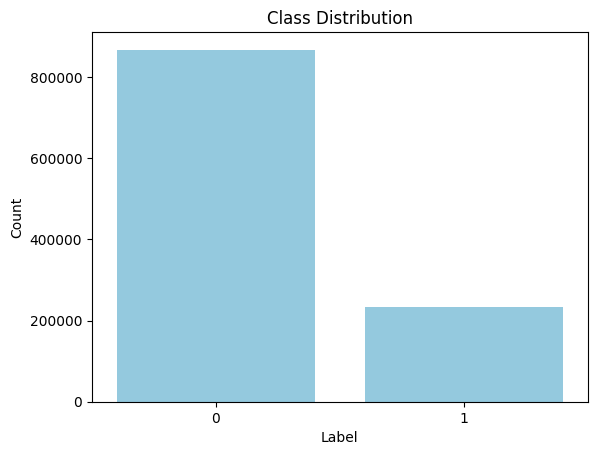

In [8]:
# Simple bar plot
sns.barplot(data=label_counts, x='label', y='count', color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Create Train-Dev-Test Splits

In [9]:
# First split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=random_state, shuffle = True, stratify = df['label'])

# Second split: dev (10%) and test (10%)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, shuffle = True, stratify = temp_df['label'])

# Reset index for train
train_df = train_df.reset_index(drop = True)

# Reset index for dev
dev_df = dev_df.reset_index(drop = True)

# Reset index for test
test_df = test_df.reset_index(drop = True)

# Check sizes
print(len(train_df), len(dev_df), len(test_df))


880932 110116 110117


In [10]:
train_df.head()

,label,text
0,0,"Trust me from all I've seen,most those who are..."
1,0,Especially that wee cunt that walks about tens...
2,0,"::Sceptre is correct, and I am re-inserting ..."
3,0,My last boss would have insta fired an employe...
4,1,RT @rajahbaitonee: ALI FUCK YOUUU!!!!! &#12851...


In [11]:
dev_df.head()

,label,text
0,1,@OpheliaUp Ugh what faggot! So extra!
1,0,"== welcome == *Welcome! Hello, , and welco..."
2,0,coolestlifehack: virgin islands dwarf gecko o...
3,0,` No because there are lots of other famous J...
4,0,i-its international sites g-guys


In [12]:
test_df.head()

,label,text
0,0,The claim that SIX MILLION Jews were gassed do...
1,0,If you subscribe for me my channel. May God bl...
2,0,i would much rather have either green or blue ...
3,0,"oh and btw your ""LETS GO TO FUCKING SWINGERS"" ..."
4,1,== bite me == that is all. cunt


## Save Train-Dev-Test Splits

In [13]:
train_df.to_csv("data/training_data_cleaned.csv")
dev_df.to_csv("data/dev_data_cleaned.csv")
test_df.to_csv("data/test_data_cleaned.csv")